In [1]:
#pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv("D:/0000_projects/Dementia_detection_using_AI/artifacts/raw_data/dementia_dataset/dementia_dataset.csv")

In [4]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [5]:
print(df.Group.unique())
df["Group"].value_counts()

['Nondemented' 'Demented' 'Converted']


Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

# removing dummy variables

In [6]:
df = pd.get_dummies(df, columns=['M/F', 'Group','Hand'], drop_first=True)

In [7]:
df

,Subject ID,MRI ID,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Group_Demented,Group_Nondemented
0,OAS2_0001,OAS2_0001_MR1,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,0,1
1,OAS2_0001,OAS2_0001_MR2,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,0,1
2,OAS2_0002,OAS2_0002_MR1,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,1,1,0
3,OAS2_0002,OAS2_0002_MR2,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010,1,1,0
4,OAS2_0002,OAS2_0002_MR3,3,1895,80,12,NaN,22.0,0.5,1698,0.701,1.034,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1,0
369,OAS2_0185,OAS2_0185_MR3,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1,0
370,OAS2_0186,OAS2_0186_MR1,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,0,1
371,OAS2_0186,OAS2_0186_MR2,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,0,1


In [8]:
df.isnull()

,Subject ID,MRI ID,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Group_Demented,Group_Nondemented
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

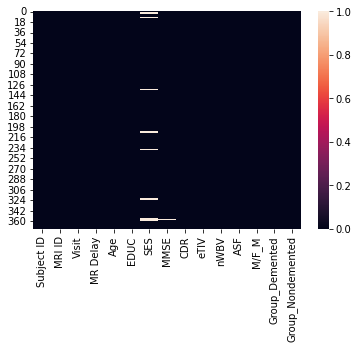

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.dropna(inplace= True)
df

,Subject ID,MRI ID,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Group_Demented,Group_Nondemented
0,OAS2_0001,OAS2_0001_MR1,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,0,1
1,OAS2_0001,OAS2_0001_MR2,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,0,1
5,OAS2_0004,OAS2_0004_MR1,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,0,1
6,OAS2_0004,OAS2_0004_MR2,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,0,0,1
7,OAS2_0005,OAS2_0005_MR1,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1,0
369,OAS2_0185,OAS2_0185_MR3,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1,0
370,OAS2_0186,OAS2_0186_MR1,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,0,1
371,OAS2_0186,OAS2_0186_MR2,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,0,1


<AxesSubplot:>

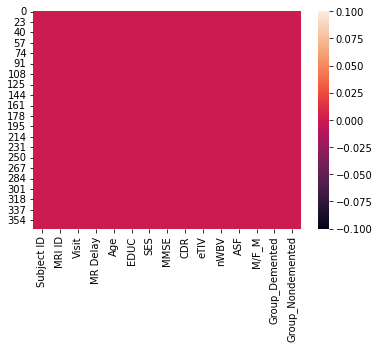

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M,Group_Demented,Group_Nondemented
Visit,1.000000,0.922833,0.186306,0.013574,-0.051622,-0.029031,-0.015544,0.128745,-0.123453,-0.133897,0.064174,-0.135706,0.098128
MR Delay,0.922833,1.000000,0.204313,0.044399,-0.030813,0.073640,-0.066391,0.119383,-0.102139,-0.125088,0.045183,-0.178576,0.115914
Age,0.186306,0.204313,1.000000,-0.024977,-0.046857,0.055880,-0.022759,0.040182,-0.526316,-0.031783,-0.027910,-0.079506,0.003311
EDUC,0.013574,0.044399,-0.024977,1.000000,-0.722647,0.184459,-0.129440,0.267933,-0.019822,-0.251677,0.089937,-0.226760,0.163307
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576,-0.045776,0.205556,-0.062463
MMSE,-0.029031,0.073640,0.055880,0.184459,-0.149219,1.000000,-0.705962,-0.019439,0.341381,0.027745,-0.159501,-0.622768,0.527441
CDR,-0.015544,-0.066391,-0.022759,-0.129440,0.076160,-0.705962,1.000000,0.052361,-0.350086,-0.063413,0.205822,0.812724,-0.773560
eTIV,0.128745,0.119383,0.040182,0.267933,-0.261575,-0.019439,0.052361,1.000000,-0.206668,-0.989030,0.571443,0.003023,0.033780
nWBV,-0.123453,-0.102139,-0.526316,-0.019822,0.090095,0.341381,-0.350086,-0.206668,1.000000,0.211150,-0.241709,-0.290916,0.313929
ASF,-0.133897,-0.125088,-0.031783,-0.251677,0.255576,0.027745,-0.063413,-0.989030,0.211150,1.000000,-0.560791,-0.007458,-0.021401


In [13]:
df.columns

Index(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F_M', 'Group_Demented',
       'Group_Nondemented'],
      dtype='object')

In [15]:
#X = df.iloc[:,2] # removing the 3rd column
y = df['Group_Demented']
y


0      0
1      0
5      0
6      0
7      0
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group_Demented, Length: 354, dtype: uint8

In [16]:
#Removing unwanted columnms such as id or Group_Nondemented as Group_demented is already present
X = df.drop(labels=['MRI ID','Subject ID','Group_Nondemented','Group_Demented'], axis=1)
X

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,1
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,1
369,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,1
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,0
371,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,0


In [17]:
df.columns

Index(['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F_M', 'Group_Demented',
       'Group_Nondemented'],
      dtype='object')

In [18]:
y.value_counts()
#print(y)

0    227
1    127
Name: Group_Demented, dtype: int64

In [19]:
#sns.pairplot(X) # to know the co-relation between fetures

# FINDING COORELATION BETWEEN FEATURES

In [20]:
corr_mat = df.corr()
top_corr_features = corr_mat.index

In [21]:
top_corr_features

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'M/F_M', 'Group_Demented', 'Group_Nondemented'],
      dtype='object')

In [22]:
#
#plt.figure(figsize=(20,20))
#g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

In [23]:
corr_mat.index

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'M/F_M', 'Group_Demented', 'Group_Nondemented'],
      dtype='object')

# FEATURE IMPORTANCE

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
#model.fit(X,y)

In [25]:
#X = X.values
#print(X)
#y = y.values
#print(y)

In [26]:
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.02241582 0.05256354 0.02025765 0.01601404 0.02512317 0.16530908
 0.62007054 0.01693544 0.01819054 0.01836066 0.02475952]


In [28]:
X.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'M/F_M'],
      dtype='object')

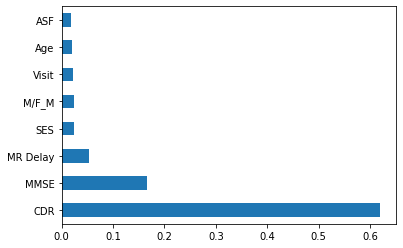

In [29]:
#Now wre going to use graph to see feature importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
#feat_importance.nlargest(5).plot(kind='barh')
feat_importance.nlargest(8).plot(kind='barh')
plt.show()

D:\0000_projects\Dementia_detection_using_AI\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Group_Demented', ylabel='Density'>

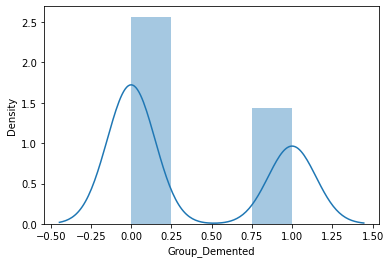

In [30]:
sns.distplot(y)

------------------------------------------------------------------------------------------------------------------------------

   # LOGISTIC_REGRESSION

-------------------------------------------------------------------------------------------------------------------------------

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [33]:
X_train

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
110,1,0,74,18,2.0,29.0,0.0,1463,0.737,1.199,1
286,2,793,78,16,3.0,27.0,0.5,1393,0.690,1.260,0
124,2,212,79,14,3.0,26.0,0.5,1308,0.706,1.341,1
37,2,756,82,20,1.0,28.0,0.5,1606,0.677,1.093,1
42,2,828,64,16,3.0,29.0,0.0,1316,0.796,1.333,0
...,...,...,...,...,...,...,...,...,...,...,...
77,2,486,83,18,2.0,25.0,0.5,1179,0.733,1.488,0
112,1,0,82,16,3.0,29.0,0.0,1484,0.760,1.183,0
282,2,846,75,16,2.0,28.0,0.0,1106,0.767,1.587,0
367,1,0,80,16,1.0,28.0,0.5,1704,0.711,1.030,1


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [35]:
model.fit(X_train,y_train)

D:\0000_projects\Dementia_detection_using_AI\env\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [36]:
model.coef_

array([[ 3.52179290e-02, -1.03071808e-03, -6.66586857e-03,
         3.38507391e-01,  1.54530899e+00, -5.37549508e-01,
         1.64064835e+00,  3.30633709e-03,  1.22260075e-01,
         3.97944030e-01,  4.33681628e-01]])

MODEL EVALUATION

In [38]:
#coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#coeff_df


In [39]:
prediction = model.predict(X_test)

D:\0000_projects\Dementia_detection_using_AI\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Group_Demented', ylabel='Density'>

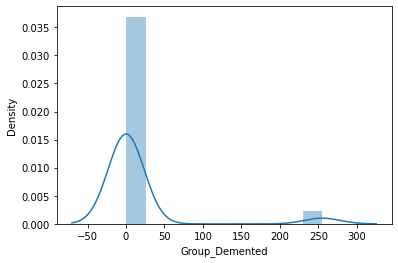

In [40]:
sns.distplot(y_test-prediction)

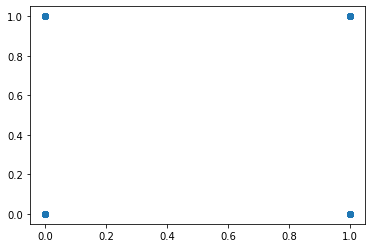

In [41]:
plt.scatter(y_test,prediction)

# FINDING RMSE MSE MAE

In [42]:
from sklearn import metrics

In [43]:
#print('MAE:', metrics.mean_absolute_error(y_test, prediction))
#print('MSE:', metrics.mean_squared_error(y_test, prediction))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Finding Accuracy using Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

#prediction

array([[71,  7],
       [11, 28]], dtype=int64)

In [47]:
print(y_test)
print(prediction)

230    0
48     0
298    0
189    0
62     0
      ..
156    0
85     0
130    0
24     0
140    1
Name: Group_Demented, Length: 117, dtype: uint8
[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0]


In [49]:
def accur(real_data, predicted_data):
    correct = 0
    if real_data.size == predicted_data.size:
        for i in range(real_data):
            if real_data == predicted_data:
                correct= correct+1
        
        return correct
    else:
        return -1

#accur(y_test, prediction)

In [50]:
from sklearn.metrics import accuracy_score

score =accuracy_score(y_test,prediction)
print(score)

0.8461538461538461


# SAVING THE MODEL

In [51]:
import joblib
file_loc= "../artifacts/model/linear_regression.pk1"
joblib.dump(value=model, filename  =file_loc)

FileNotFoundError: [Errno 2] No such file or directory: '../artifacts/model/linear_regression.pk1'

# RECHECKING THE MODEL 

In [ ]:
model_up = joblib.load(file_loc)